In [4]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [5]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [6]:
y.shape, tx.shape

((202,), (202, 2))

# Computing the Cost Function
Fill in the the `compute_cost` function below:

In [7]:
def compute_cost(y, tx, w):
    """calculate the cost.
    you can calculate the cost by mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MAE
    # ***************************************************
    e = np.absolute(y - np.dot(tx,w)) 
    toReturn = (np.sum(e) / y.shape[0])
    return toReturn

def compute_cost1(y, tx, w):
    """calculate the cost.
    you can calculate the cost by mse.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    e = y - np.dot(tx,w) 
    toReturn = (np.dot(e.T, e) / (2*y.shape[0]))
    return toReturn

# Grid Search

Fill in the function `grid_search()` below:

In [8]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    loss = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for i in range(0, len(w0)) :
        for j in range(0, len(w1)) :
            loss[i, j] = compute_cost(y, tx, np.array([w0[i], w1[j]]))
    return loss


Let us play with the grid search demo now!

Done...
Grid Search: loss*=7.956595728172087, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.032 seconds


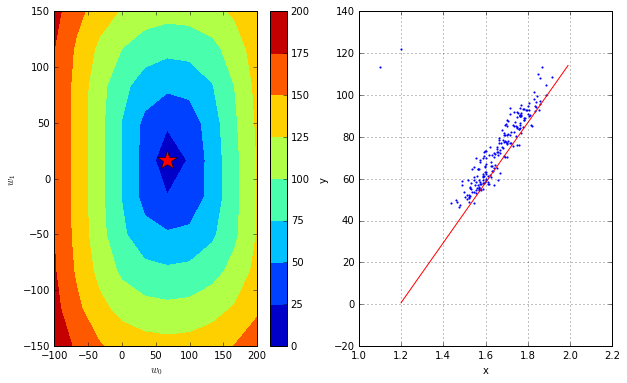

In [9]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization
import datetime

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)
print("Done...")

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving


# Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [10]:
def compute_gradient(y,tx,w):
    """Compute the gradient with MAE."""
    e = y - np.dot(tx,w.T)
    s = np.sign(e).reshape(-1,1)
    toReturn = np.sum(-tx*s,axis=0)/len(y) 
    return toReturn
            


def compute_gradient1(y, tx, w):
    """Compute the gradient with MSE."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    # ***************************************************
    e = y - np.dot(tx,w.T)
    toReturn = -np.dot(tx.T,e) / y.shape[0]
    return toReturn
#print("w = (100,20) :",compute_gradient(y,tx,np.array([100,20])))
#print("w = (100,20) norm :",np.linalg.norm(compute_gradient(y,tx,np.array([100,20]))))
#print("w = (50,10) :",compute_gradient(y,tx,np.array([50,10])))
#print("w = (50,10) norm :",np.linalg.norm(compute_gradient(y,tx,np.array([50,10]))))

#to test
#compute_gradient(np.array([1,3]),np.array([[1,4],[1,5]]),np.array([1,2]))

Please fill in the functions `gradient_descent` below:

In [11]:
def gradient_descent(y, tx, initial_w, max_iters, gamma): 
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        gradient = compute_gradient(y,tx,w)
        loss = compute_cost(y,tx,w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w_new = w - gamma*gradient
        w = w_new
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [21]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 100
gamma = 20

# Initialization
w_initial = np.array([0,0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/99): loss=74.06780585492638, w0=20.0, w1=1.745578379311632e-14
Gradient Descent(1/99): loss=54.067805854926384, w0=40.0, w1=3.491156758623264e-14
Gradient Descent(2/99): loss=34.067805854926384, w0=60.0, w1=5.2367351379348965e-14
Gradient Descent(3/99): loss=16.68291839004858, w0=69.70297029702971, w1=9.918465380374434
Gradient Descent(4/99): loss=7.840923112539188, w0=75.04950495049505, w1=19.727807498783747
Gradient Descent(5/99): loss=6.568059487912669, w0=68.31683168316832, w1=12.025255580288075
Gradient Descent(6/99): loss=7.4213260933282506, w0=77.22772277227723, w1=18.40090924140687
Gradient Descent(7/99): loss=7.105187023525762, w0=66.33663366336634, w1=14.012738537114839
Gradient Descent(8/99): loss=8.209044226617369, w0=81.98019801980199, w1=15.21309003259486
Gradient Descent(9/99): loss=10.109569425789081, w0=63.960396039603964, w1=14.69239382093129
Gradient Descent(10/99): loss=10.249736500182767, w0=82.37623762376238, w1=15.015160631524212
Gradient Desce

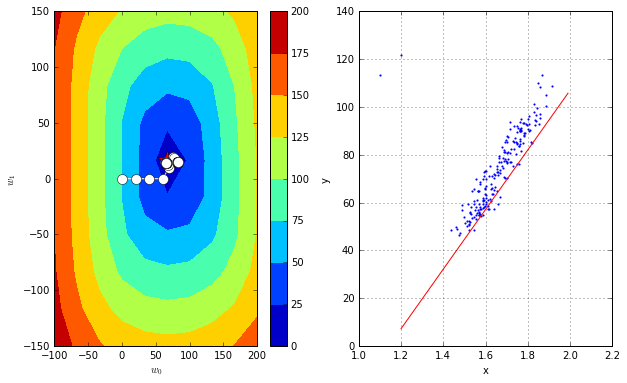

In [22]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# Stochastic gradient descent

In [18]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient for batch data."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.
    # ***************************************************
    
    #We simply compute the normal gradient of this batch
    
    #Is this what we should do?
    #toReturn = np.sum([compute_gradient(yn,txn,w) for (yn,txn) in zip(y,tx)])/len(y)
    return compute_gradient(y,tx,w)

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_epochs, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    batches = batch_iter(y, tx, batch_size)
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_epochs):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        y,tx = batches.__next__()
        gradient = compute_stoch_gradient(y,tx,w)
        loss = compute_cost(y,tx,w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w_new = w - gamma*gradient
        w = w_new
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_epochs - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws


In [29]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 100
gamma = 2
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/99): loss=81.29793408647726, w0=2.0, w1=0.7718241436847716
Gradient Descent(1/99): loss=68.2246594921449, w0=4.0, w1=1.3397123317376987
Gradient Descent(2/99): loss=80.52948122071177, w0=6.0, w1=3.108664891579603
Gradient Descent(3/99): loss=70.93562841474598, w0=8.0, w1=3.152401082185706
Gradient Descent(4/99): loss=49.191606620288766, w0=10.0, w1=1.5890802186603623
Gradient Descent(5/99): loss=57.18706547290835, w0=12.0, w1=-0.37290445421431384
Gradient Descent(6/99): loss=79.46641095479231, w0=14.0, w1=1.2076838774317245
Gradient Descent(7/99): loss=55.822993742075646, w0=16.0, w1=1.952575938522764
Gradient Descent(8/99): loss=75.20337449515253, w0=18.0, w1=4.043903348544578
Gradient Descent(9/99): loss=66.31900350187281, w0=20.0, w1=4.604887901450944
Gradient Descent(10/99): loss=60.179137209722704, w0=22.0, w1=6.607556465550237
Gradient Descent(11/99): loss=39.29983602536842, w0=24.0, w1=5.807759344303199
Gradient Descent(12/99): loss=39.739347150263754, w0=26.0

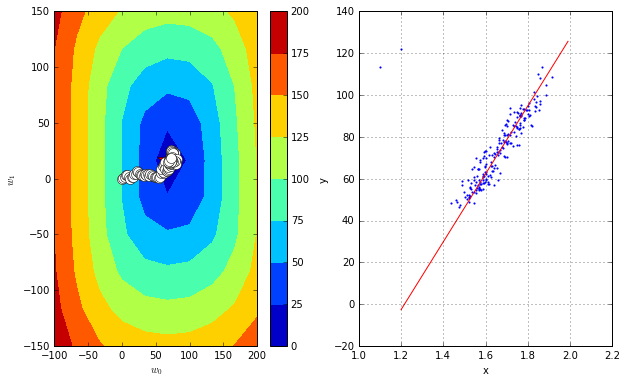

In [30]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))